<a href="https://colab.research.google.com/github/hanlinz-star/Exercise-2/blob/main/Exercise%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment task-Find the best text classification model for the sentimental analysis

Data Preparation

In [1]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


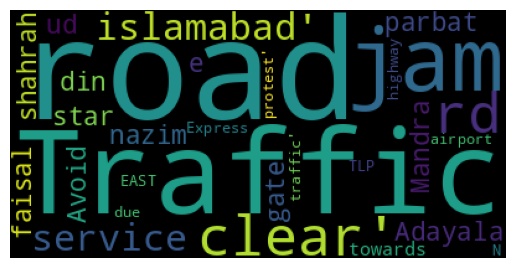

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


In [4]:
# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

In [5]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                          
          count unique                           top freq
Sentiment                                                
0          1008   1008           I8 is clear at 8 am    1
1          1079   1079  Express highway have traffic    1

Validate the trained model with the 20% of the dataset set aside for testing and show the results in a confusion matrix and accuracy:

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import HashingVectorizer

1.Vectorization:CountVectorizer

{'C': 1}
The accuracy of LR is: 0.937799043062201
{'n_neighbors': 5, 'weights': 'uniform'}
The accuracy of KNN is: 0.9258373205741627
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
The accuracy of RF is: 0.9641148325358851
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
The accuracy of XGBOOST is: 0.9593301435406698
{'C': 10, 'kernel': 'rbf'}
The accuracy of SVM is: 0.9569377990430622
{'alpha': 1, 'force_alpha': True}
The accuracy of Naïve Bayes models is: 0.9425837320574163


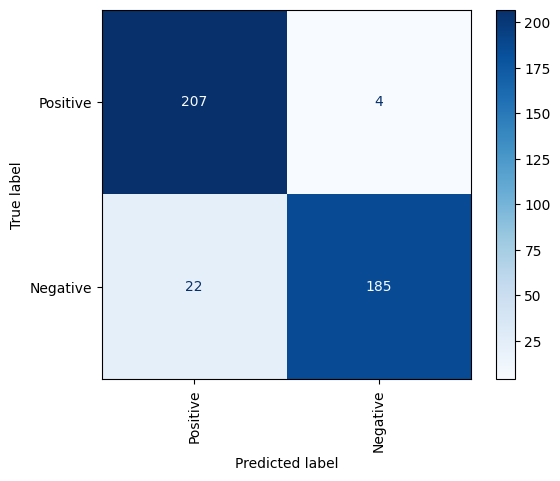

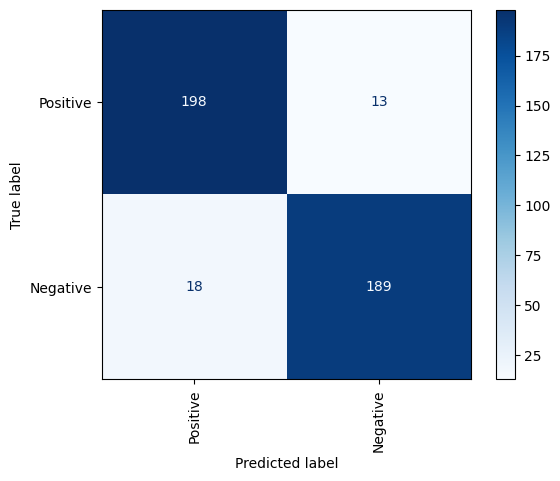

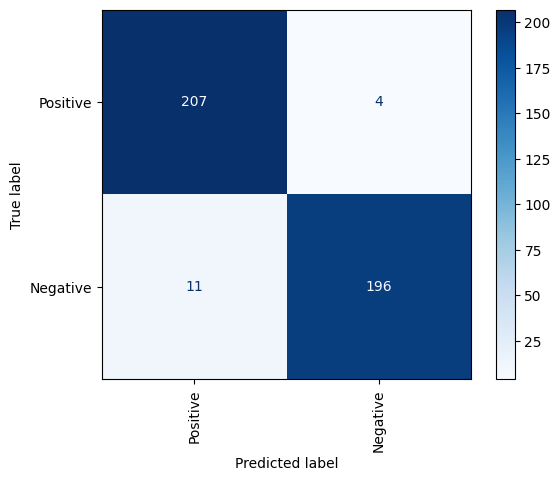

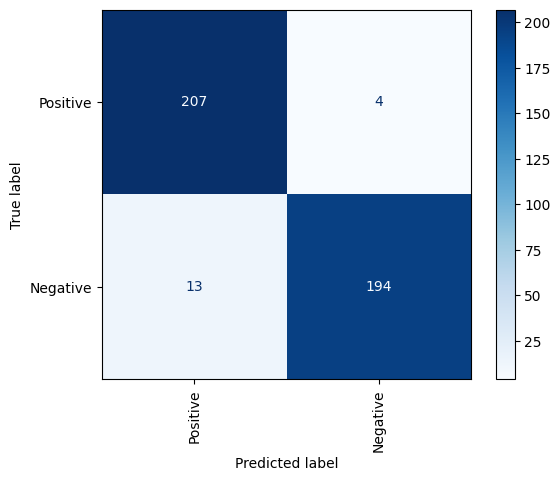

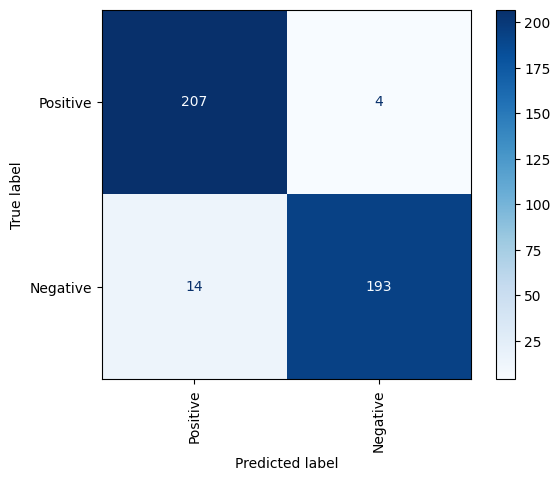

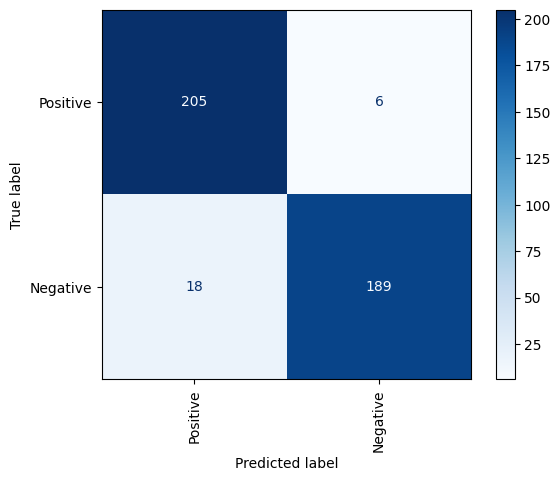

In [10]:

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized  = vectorizer.transform(x_test)

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of LR is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(2)KNN
model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of KNN is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(3)RF
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of RF is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(4)XGBoost
model = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of XGBOOST is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(5)SVM
model = SVC(probability=True)
param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of SVM is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(6)Naïve Bayes models
model = BernoulliNB()
param_grid = {'alpha': [0.1, 0.5, 1], 'force_alpha': [True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of Naïve Bayes models is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))


2.Vectorization:HashingVectorizer

{'C': 10}
The accuracy of LR is: 0.9497607655502392
{'n_neighbors': 9, 'weights': 'uniform'}
The accuracy of KNN is: 0.9521531100478469
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
The accuracy of RF is: 0.9712918660287081
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
The accuracy of XGBOOST is: 0.9712918660287081
{'C': 10, 'kernel': 'rbf'}
The accuracy of SVM is: 0.9712918660287081
{'alpha': 1, 'force_alpha': True}
The accuracy of Naïve Bayes models is: 0.8349282296650717


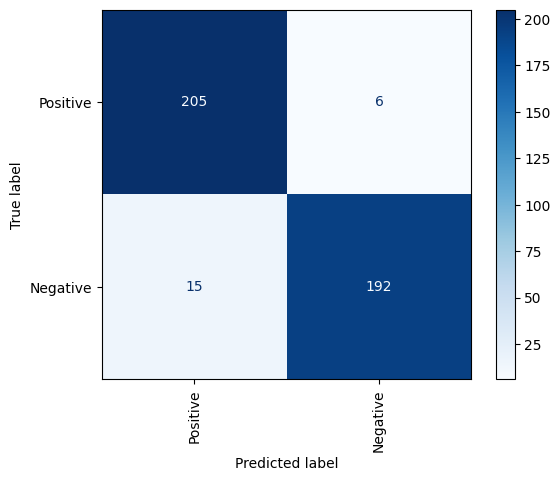

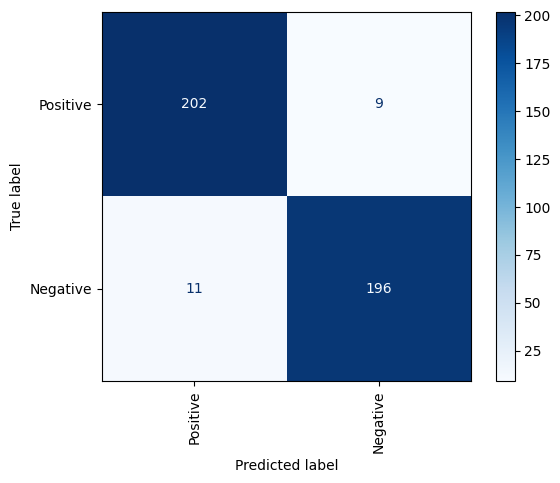

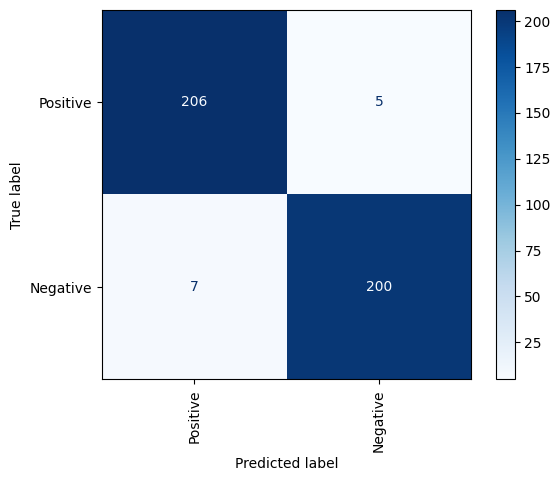

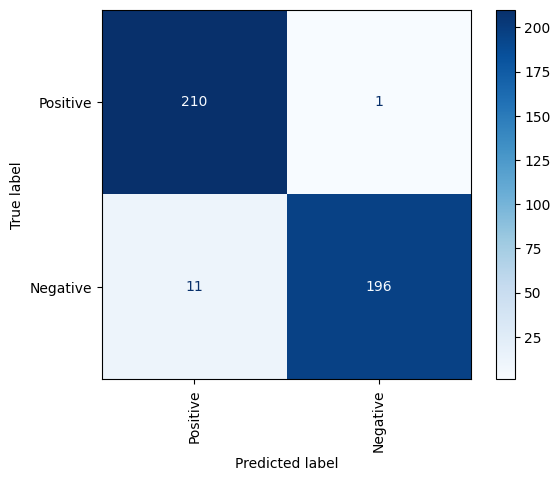

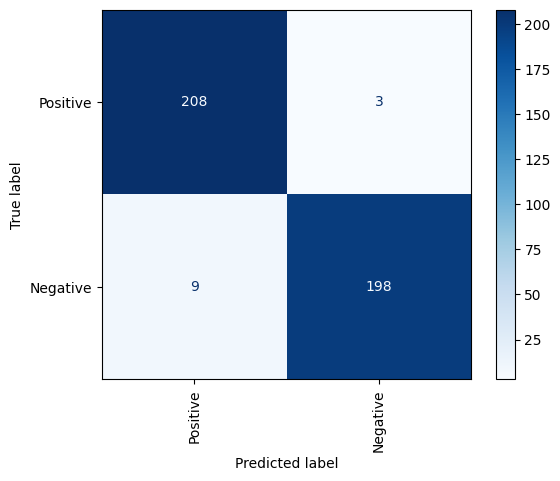

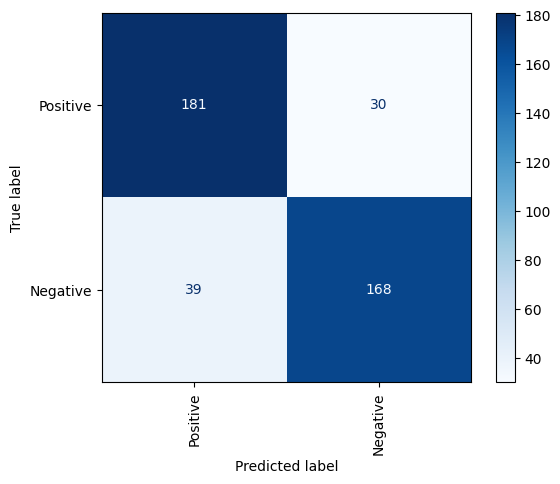

In [11]:


#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
#(2) HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized  = vectorizer.transform(x_test)

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of LR is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(2)KNN
model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of KNN is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(3)RF
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of RF is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(4)XGBoost
model = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of XGBOOST is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(5)SVM
model = SVC(probability=True)
param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of SVM is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(6)Naïve Bayes models
model = BernoulliNB()
param_grid = {'alpha': [0.1, 0.5, 1], 'force_alpha': [True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of Naïve Bayes models is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))


3.Vectorization:FfidVectorizer

{'C': 0.1}
The accuracy of LR is: 0.9545454545454546
{'n_neighbors': 5, 'weights': 'distance'}
The accuracy of KNN is: 0.9090909090909091
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
The accuracy of RF is: 0.9712918660287081
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
The accuracy of XGBOOST is: 0.9641148325358851
{'C': 0.1, 'kernel': 'rbf'}
The accuracy of SVM is: 0.9593301435406698
{'alpha': 1, 'force_alpha': True}
The accuracy of Naïve Bayes models is: 0.9401913875598086


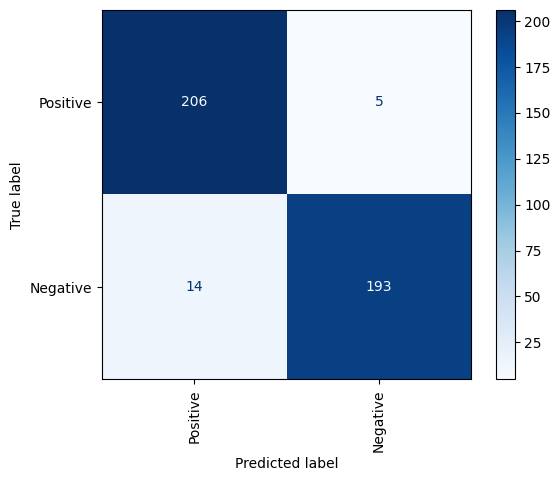

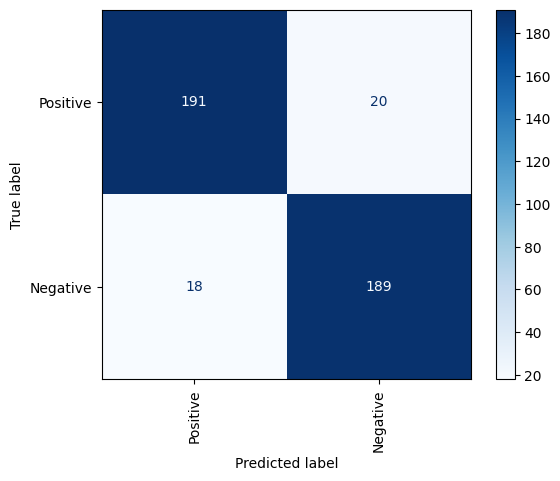

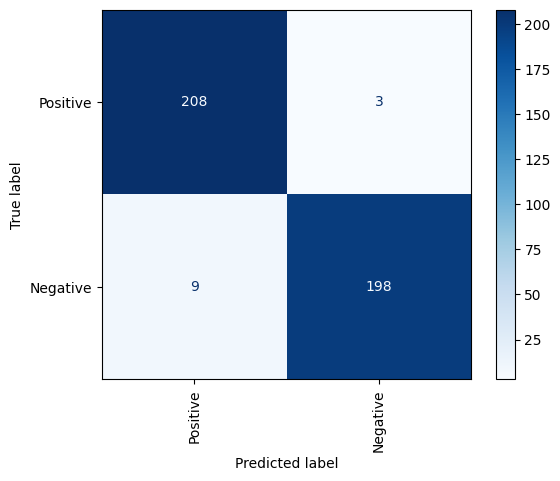

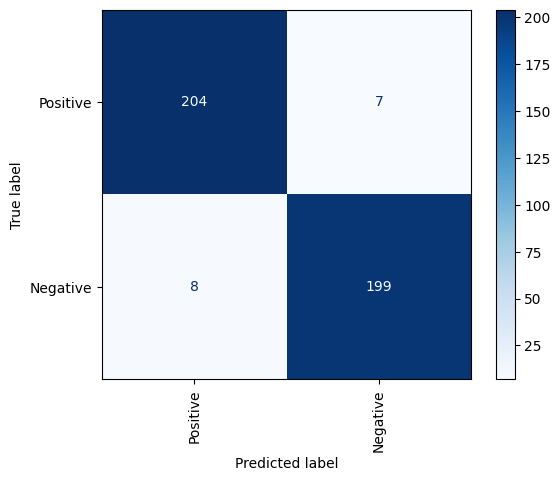

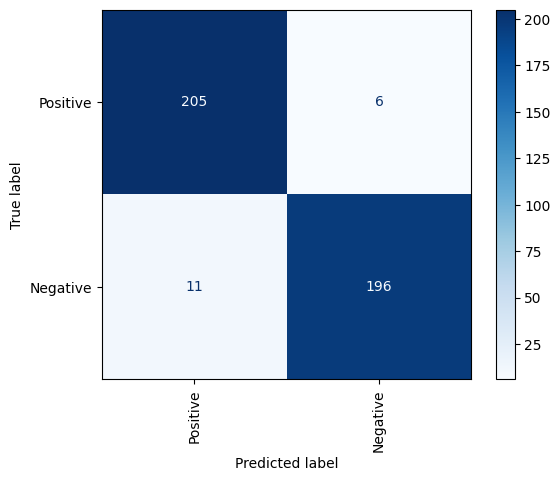

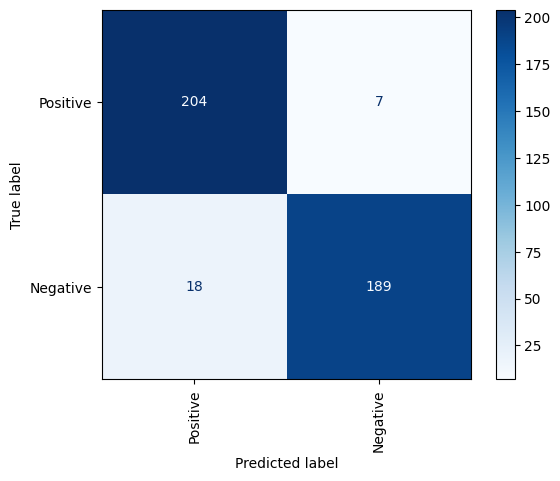

In [12]:


#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
)
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized  = vectorizer.transform(x_test)

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of LR is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(2)KNN
model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of KNN is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(3)RF
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of RF is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(4)XGBoost
model = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of XGBOOST is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(5)SVM
model = SVC(probability=True)
param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of SVM is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(6)Naïve Bayes models
model = BernoulliNB()
param_grid = {'alpha': [0.1, 0.5, 1], 'force_alpha': [True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of Naïve Bayes models is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))


4.CountVectorizer:Another set of parameters

{'C': 1}
The accuracy of LR is: 0.937799043062201
{'n_neighbors': 11, 'weights': 'distance'}
The accuracy of KNN is: 0.9641148325358851
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 800}
The accuracy of RF is: 0.9688995215311005
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
The accuracy of XGBOOST is: 0.9593301435406698
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
The accuracy of SVM is: 0.9569377990430622
{'alpha': 1.0, 'binarize': 0.0, 'force_alpha': True}
The accuracy of Naïve Bayes models is: 0.9425837320574163


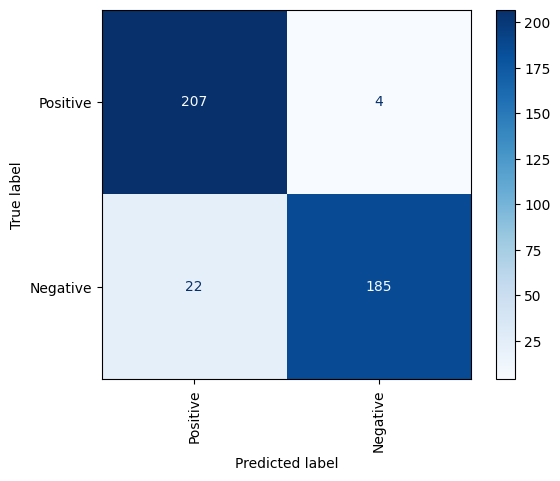

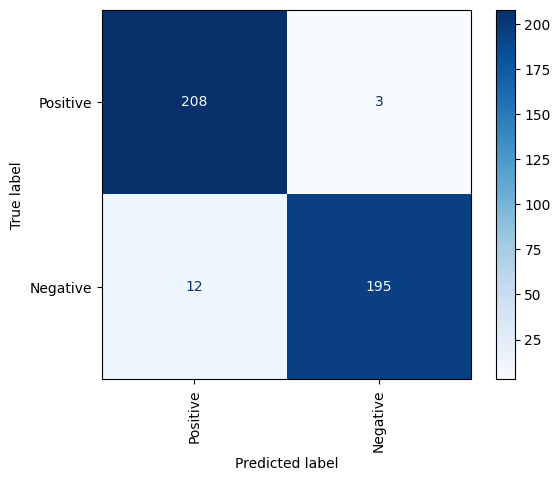

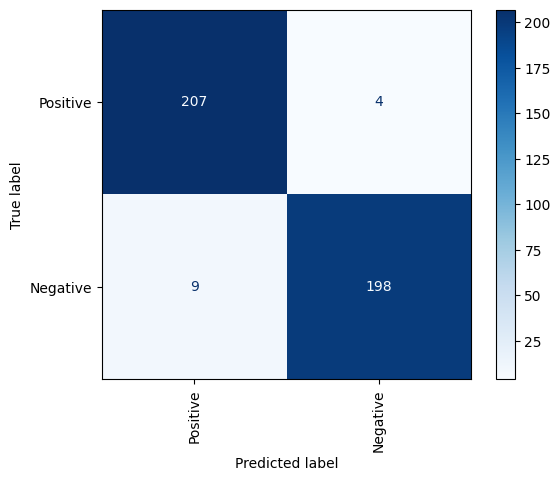

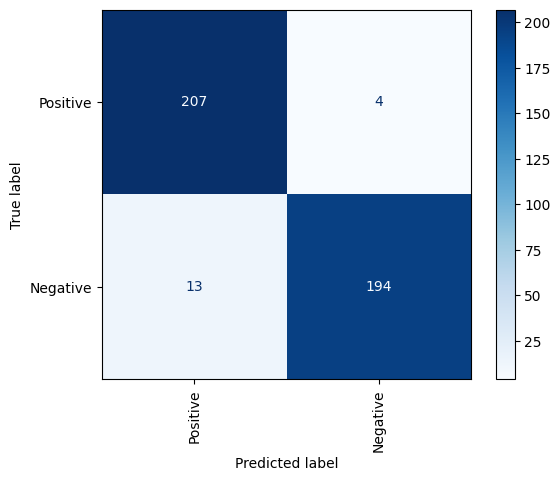

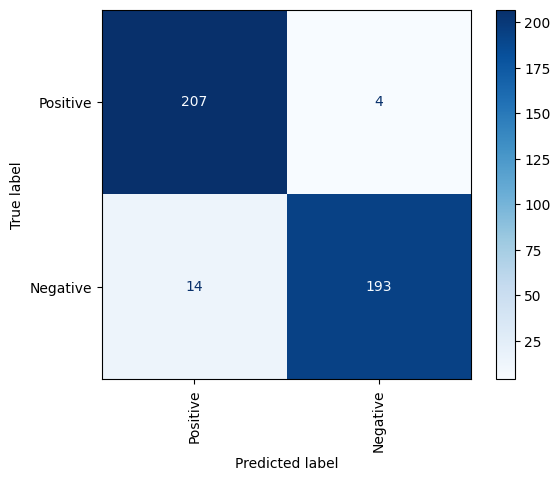

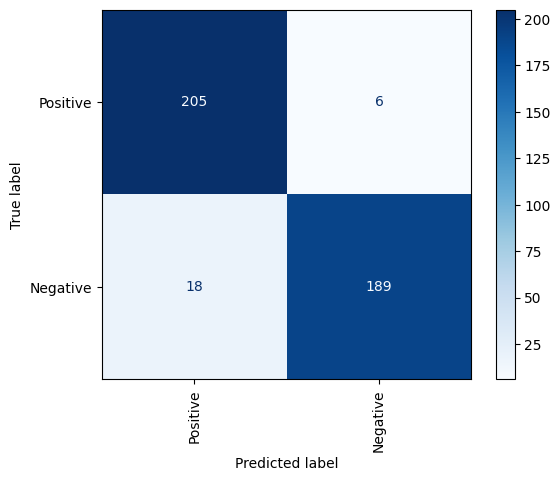

In [13]:

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized  = vectorizer.transform(x_test)

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {'C': [0.003, 0.1, 0.3, 1, 3, 10]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of LR is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(2)KNN
model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 11], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of KNN is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(3)RF
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [200, 400, 800],
    'max_depth': [10, 30, None],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 3, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of RF is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(4)XGBoost
model = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of XGBOOST is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(5)SVM
model = SVC(probability=True)
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of SVM is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))

#(6)Naïve Bayes models
model = BernoulliNB()
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0],
    'binarize': [0.0, 0.01, 0.1],
    'force_alpha': [True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)
print(grid_search.best_params_); model = grid_search.best_estimator_
cmd.from_estimator(model, x_test_vectorized, y_test, display_labels=['Positive','Negative'], cmap='Blues', xticks_rotation='vertical')
print('The accuracy of Naïve Bayes models is: '+str(accuracy_score(y_test, model.predict(x_test_vectorized))))
